In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

# Wine classification

In [10]:
from sklearn.datasets import load_wine
dataset = load_wine ()
X = dataset[ "data" ]
y = dataset[ "target" ]
feature_names= dataset["feature_names"]
wine = pd.DataFrame(X,columns=feature_names)

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

Tree plot

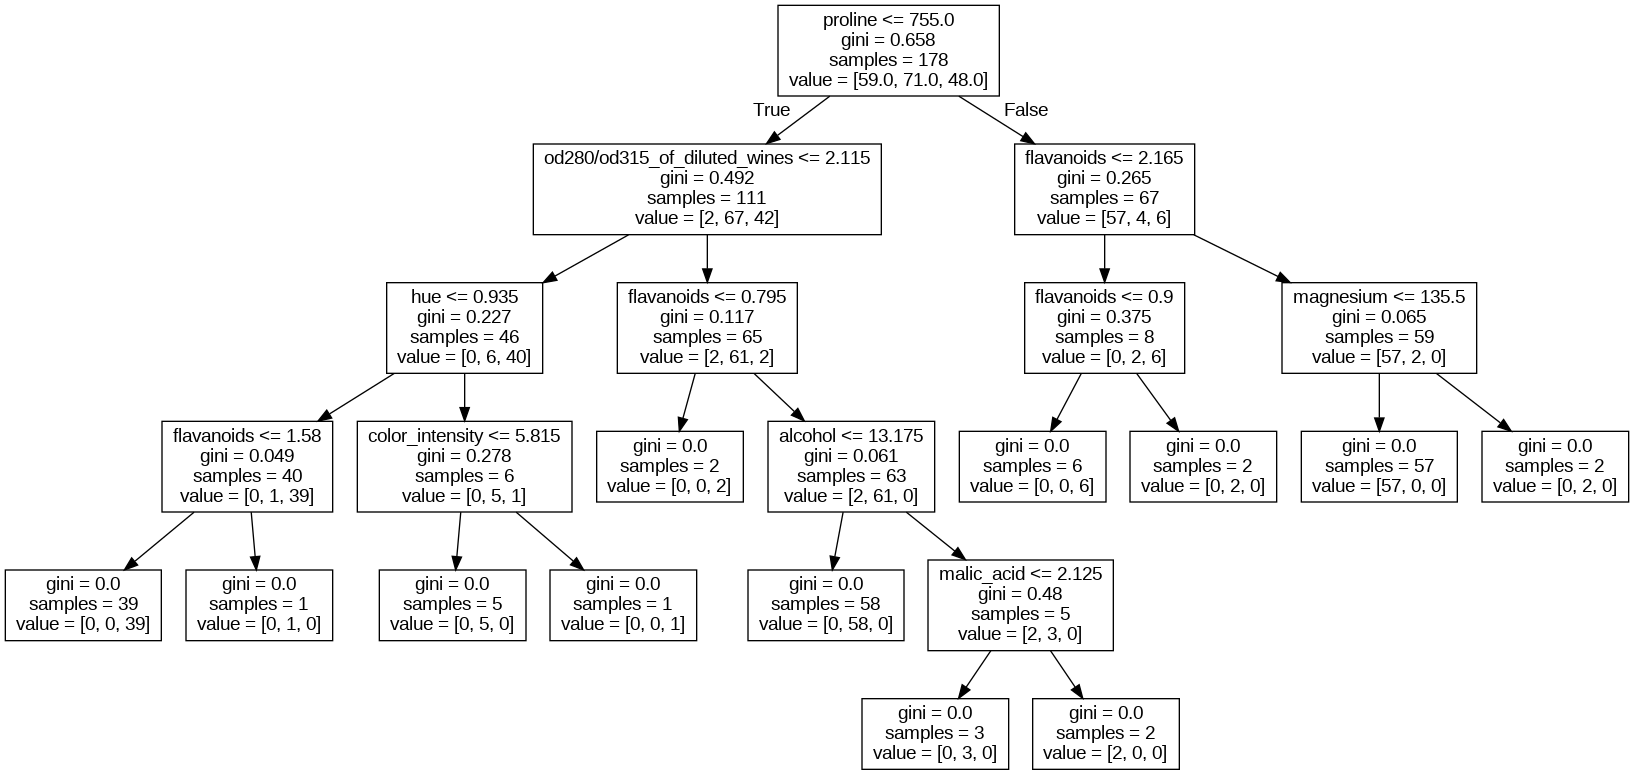

In [21]:
import pydot
from IPython . display import Image
from sklearn . tree import export_graphviz
# here , features is a list of names , one for each feature
# this makes the resulting tree visualization more comprehensible
dot_code = export_graphviz ( clf , feature_names = feature_names )
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

In [24]:
from  sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
accuracy = accuracy_score(y,y_pred)
print(accuracy)
#ofc accuracy is 1.0 because the test dataset is contained in the train so the model already saw everything

1.0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100 ,"%")

88.11188811188812 %
